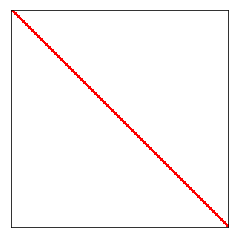

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
cv2.line(img, (0, 0), (511, 511), (0, 0, 255), 5)
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()